In [1]:
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from contextily import add_basemap, providers
import networkx as nx

# Graph Visualization

Visualization of the graph with networkx and geopandas on top of a map of Switzerland.

In [2]:
# load the swiss boundaries data
swiss_boundaries_gdf = gpd.read_file("data/swiss-boundaries.gpkg")
swiss_boundaries_gdf["geometry"] = swiss_boundaries_gdf["geometry"].simplify(0.5) 

swiss_boundaries_gdf = swiss_boundaries_gdf.to_crs(epsg=3857)

In [3]:
# load our graph and related data
G = nx.read_edgelist("data/sbb.edgelist", delimiter=";", create_using=nx.Graph)

stations_gdf = gpd.read_file('data/stations.geojson')
stations_gdf = stations_gdf.to_crs(epsg=3857)

coordinates = np.column_stack((stations_gdf["geometry"].x, stations_gdf["geometry"].y))
positions = dict(zip(G.nodes, coordinates))

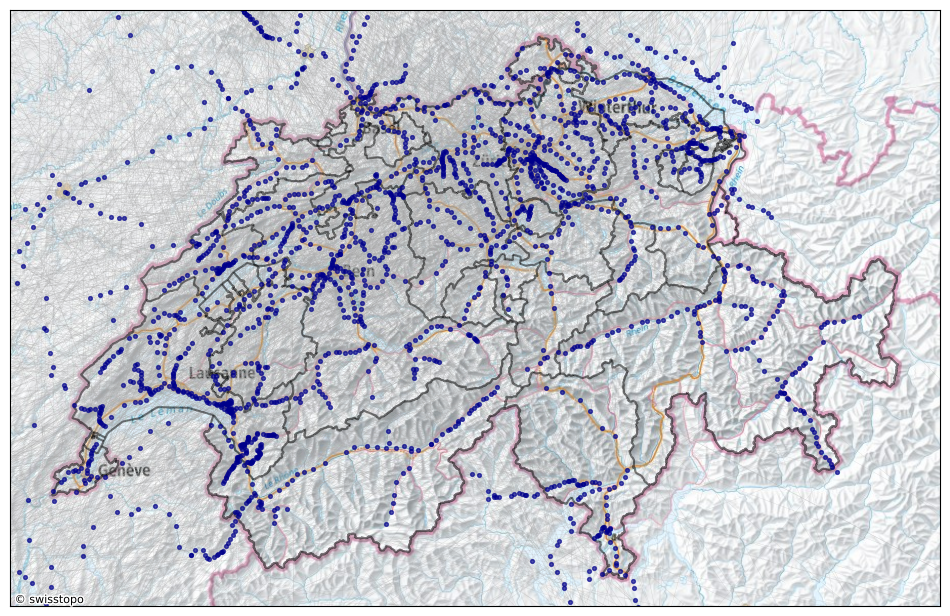

In [4]:
# cx.providers.SwissFederalGeoportal 

# select kanton lines
ax = swiss_boundaries_gdf[swiss_boundaries_gdf["typ"] != "k_W"].plot(figsize=(12, 12), alpha=0.5, edgecolor="k")
add_basemap(ax, source=providers.SwissFederalGeoportal.NationalMapColor)

nx.draw_networkx(G, positions, ax=ax, with_labels=False, 
                 node_color="darkblue", node_size=7.5, alpha=0.66,
                edge_color="darkgrey",  width=0.15
)
plt.show()

# 2nd option

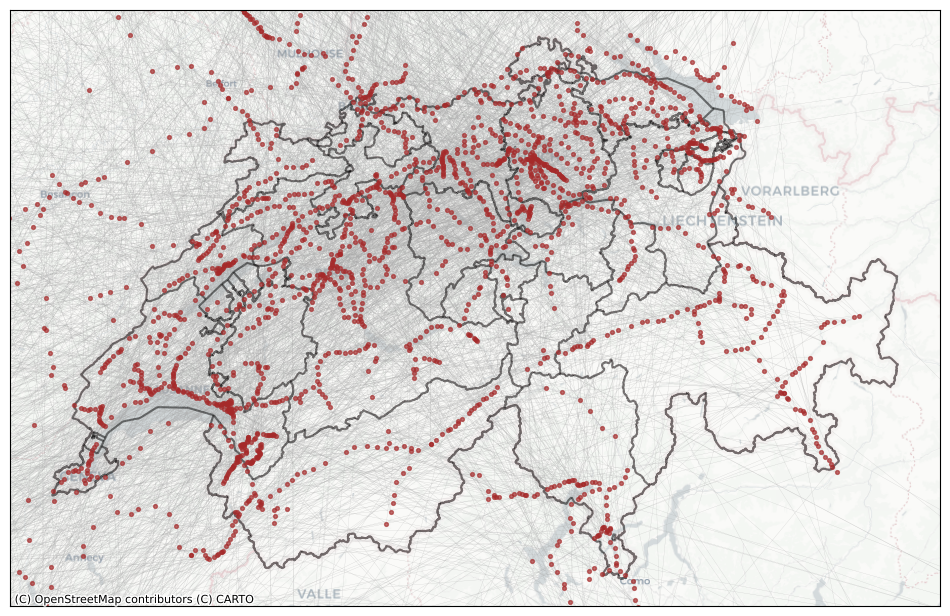

In [5]:
ax = swiss_boundaries_gdf[swiss_boundaries_gdf["typ"] != "k_W"].plot(figsize=(12, 12), alpha=0.5, edgecolor="k")
add_basemap(ax, source=providers.CartoDB.Positron)

nx.draw_networkx(G, positions, ax=ax, with_labels=False, 
                 node_color="brown", node_size=7.5, alpha=0.66,
                edge_color="darkgrey",  width=0.15
)
plt.show()